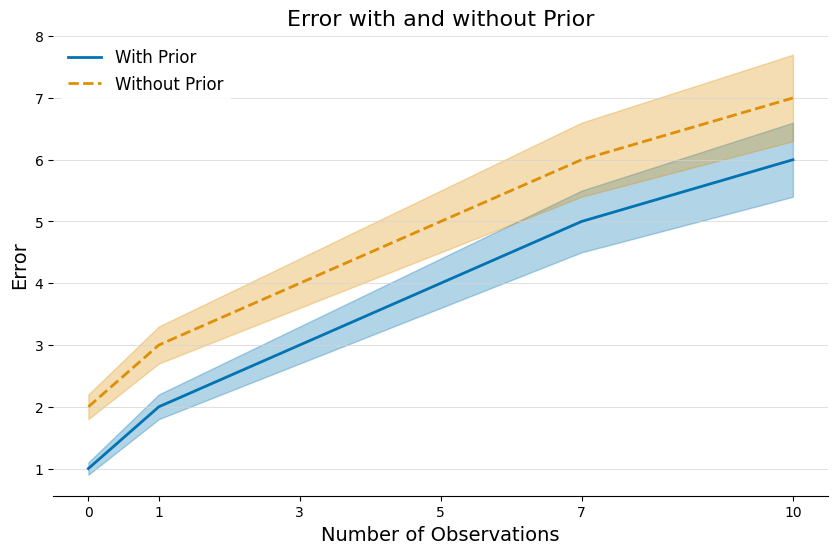

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

def plot_lines(x_list, mean1, ci1, mean2, ci2, label1, label2, xlabel, ylabel, title, save_path):
    # Plot data
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = sns.color_palette("colorblind")

    ax.plot(x_list, mean1, label=label1, color=colors[0], linestyle='-', linewidth=2)
    ax.fill_between(x_list, np.array(mean1) - np.array(ci1), np.array(mean1) + np.array(ci1), color=colors[0], alpha=0.3)

    if mean2 is not None:
        ax.plot(x_list, mean2, label=label2, color=colors[1], linestyle='--', linewidth=2)
        ax.fill_between(x_list, np.array(mean2) - np.array(ci2), np.array(mean2) + np.array(ci2), color=colors[1], alpha=0.3)

    # Customize the grid, legend, and labels
    ax.grid(True, which='major', axis='y', linestyle='-', linewidth=0.5, color='lightgrey')
    ax.grid(False, axis='x')
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, fontsize=16)

    # Customize the legend
    legend = ax.legend(loc='upper left', frameon=True, framealpha=0.9, fontsize=12)
    frame = legend.get_frame()
    frame.set_color('white')

    # Remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(True)

    # set x-axis ticks
    ax.set_xticks(x_list)

    # Set white background
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

    # save the plot
    plt.savefig(save_path, bbox_inches='tight')

# Example usage
box = False
exp_list = [0, 1, 3, 5, 7, 10] if not box else [0, 5, 10]
mean_score = [1, 2, 3, 4, 5, 6]
ci_95 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
mean_score_no_prior = [2, 3, 4, 5, 6, 7]
ci_95_no_prior = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

env = 'env'
goal = 'goal'
model = 'model'
exp = 'exp'
save_path = os.path.join('./plots', f"{env}_{goal}_{model}_{exp}_oed_error.png")

plot_lines(exp_list, mean_score, ci_95, mean_score_no_prior, ci_95_no_prior, "With Prior", "Without Prior", "Number of Observations", "Error", "Error with and without Prior", save_path)
